<a href="https://colab.research.google.com/github/takiyama0617/colaboratory/blob/master/sample_sklearn_handwritten_numeral_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import svm, metrics, datasets
import matplotlib.pyplot as plt


digits = datasets.load_digits()
image_and_labels = list(zip(digits.images, digits.target))
print('教師データ : ', digits.target)

教師データ :  [0 1 2 ... 8 9 8]


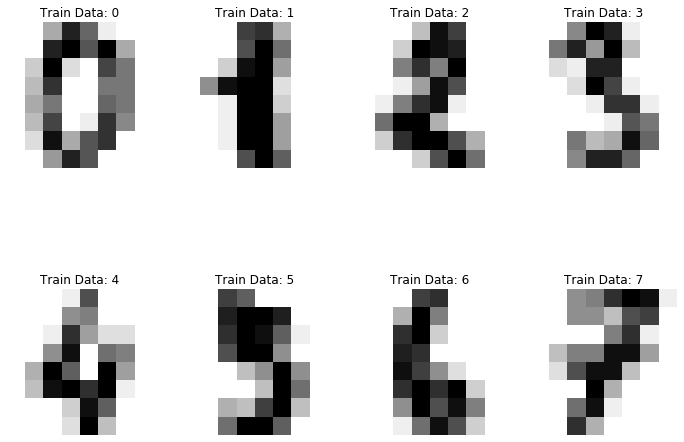

In [3]:
fig = plt.figure(figsize=(12, 9))
for index, (image, label) in enumerate(image_and_labels[: 8]):
  plt.subplot(2, 4, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Train Data: %i' % label)

In [4]:
num_samples = len(digits.images)
print(num_samples)

1797


In [5]:
print(digits.images.shape)

(1797, 8, 8)


In [7]:
data = digits.images.reshape((num_samples, -1))
print(data.shape)

(1797, 64)


In [9]:
# gammaは、１つの訓練データがデータを分ける超平面という結果に与える影響の範囲を意味する
model = svm.SVC(gamma=0.001)

# 訓練用の学習データと教師データ
train_features = data[: num_samples // 2]
train_teacher_labels = digits.target[: num_samples // 2]
# 検証用の学習データと教師データ
test_feature = data[num_samples // 2 :]
test_teacher_labels = digits.target[num_samples // 2 :]

# 最初の半分のデータを学習データとして、学習させる
model.fit(train_features, train_teacher_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
predicted = model.predict(test_feature)

print("分類器が分類した結果: %s"  %model)
print(metrics.classification_report(test_teacher_labels, predicted))
print("コンフュージョンマトリックス:")
print(metrics.confusion_matrix(test_teacher_labels, predicted))

分類器が分類した結果: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97   

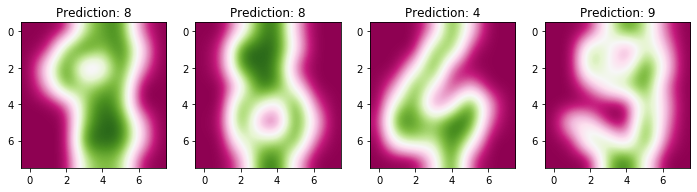

In [29]:
fig = plt.figure(figsize=(12, 9))

digits_and_predictions = list(zip(digits.images[num_samples // 2 :], predicted))
for index, (image, prediction) in enumerate(digits_and_predictions[:4]):
  plt.subplot(2, 4, index + 5)
  plt.imshow(image, cmap='PiYG', interpolation='bicubic')
  plt.title('Prediction: %i' %prediction)

plt.show()